# **FINAL PROJECT TSDW - Spotify Genre Data**

## **A. Pendahuluan**


### **Deskripsi Dataset**

Dataset ini berisi kumpulan metadata dan fitur audio lagu yang diambil dari **Spotify** menggunakan paket **spotifyr**. Fitur-fitur yang tersedia mencakup karakteristik musikal seperti **danceability**, **energy**, **loudness**, **valence**, **tempo**, **acousticness**, dan **instrumentalness**, yang dihasilkan melalui sistem analisis audio Spotify. Dataset ini terdiri dari sekitar **5000 lagu** yang berasal dari enam genre utama: **EDM**, **Latin**, **Pop**, **R&B**, **Rap**, dan **Rock**. Dengan struktur tersebut, dataset ini sangat cocok untuk analisis pola musikal, perbandingan antar-genre, visualisasi data audio, serta pembuatan model machine learning seperti klasifikasi genre.

### **Alasan Dataset Menarik**

Dataset ini menarik karena menyediakan **fitur audio yang terukur secara objektif** dari ribuan lagu Spotify, sehingga memungkinkan analisis musik berbasis data, bukan sekadar opini subjektif. Dengan adanya fitur seperti **danceability**, **energy**, **valence**, **tempo**, dan lainnya, kita dapat mengeksplorasi pola musikal, membandingkan karakteristik antar-genre, dan membangun model **machine learning** seperti klasifikasi genre atau sistem rekomendasi musik. Selain itu, cakupannya yang mencakup **enam genre populer** membuat dataset ini relevan dan kaya untuk berbagai jenis penelitian musik modern.


### **Pertanyaan / Tujuan Analisis**

1. **Bagaimana hubungan antara popularitas lagu (`track_popularity`) dengan fitur audio seperti `danceability`, `energy`, `valence`, dan `tempo`?**  

2. **Apakah tahun rilis (`track_album_release_date`) mempengaruhi (`tempo`) dan (`valence`)?**  

3. **Bagaimana pola distribusi produksi lagu tiap genre (`playlist_genre`) dari tahun ke tahun (`track_album_release_date`)?**  


## **B. Setup & Package**

### **Library yang Digunakan**

Dalam analisis data ini, digunakan beberapa library Python utama, yaitu:

- **Pandas** – digunakan untuk membaca, membersihkan, dan memanipulasi dataset.
- **Matplotlib.pyplot** – digunakan untuk membuat visualisasi dasar seperti line plot, bar chart, dan scatter plot.
- **Seaborn** – digunakan untuk visualisasi yang lebih informatif dan estetis.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
path = "../data/raw/spotify_songs.csv"

## **C. Data Preparation**

### **Import Dataset**

In [37]:
df = pd.read_csv(path)

### **Langkah - Langkah Data Cleaning dan Data Wrangling**
#### 1. Melihat 5 data pertama untuk check apakah semua data sudah terstandarisasi

In [38]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#### 2. Menampilkan type data setiap kolom, nama kolom, jumlah kolom dan, banyak data dan summary data

In [39]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


#### 3. Melihat jumlah data duplikat
##### Tidak ada data duplikat pada dataset ini

In [40]:
total = df.duplicated().sum()
print(f"Total duplikat (baris): {total}")

Total duplikat (baris): 0


#### 4. Melihat jumlah missing value per kolom

Jumlah Missing Values per Kolom:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Persentase Missing Values per Kolom:
track_id                    0.00
track_name                  0.02
track_artist                0.02
track_popularity            0.00
track_album_id              0.00
track_album_name            0.02
track_album_release_date    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'track_id'),
  Text(1, 0, 'track_name'),
  Text(2, 0, 'track_artist'),
  Text(3, 0, 'track_popularity'),
  Text(4, 0, 'track_album_id'),
  Text(5, 0, 'track_album_name'),
  Text(6, 0, 'track_album_release_date'),
  Text(7, 0, 'playlist_name'),
  Text(8, 0, 'playlist_id'),
  Text(9, 0, 'playlist_genre'),
  Text(10, 0, 'playlist_subgenre'),
  Text(11, 0, 'danceability'),
  Text(12, 0, 'energy'),
  Text(13, 0, 'key'),
  Text(14, 0, 'loudness'),
  Text(15, 0, 'mode'),
  Text(16, 0, 'speechiness'),
  Text(17, 0, 'acousticness'),
  Text(18, 0, 'instrumentalness'),
  Text(19, 0, 'liveness'),
  Text(20, 0, 'valence'),
  Text(21, 0, 'tempo'),
  Text(22, 0, 'duration_ms')])

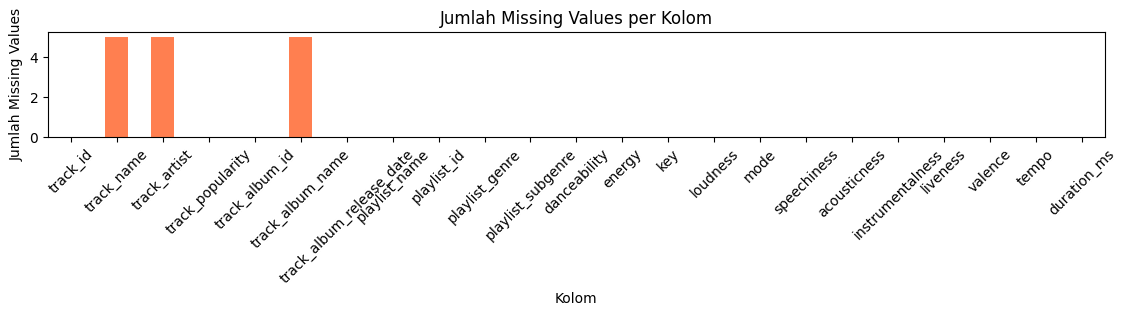

In [41]:
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

print("\nPersentase Missing Values per Kolom:")
print((df.isnull().sum() / len(df) * 100).round(2))

plt.figure(figsize=(30, 3))

missing_data = df.isnull()
missing_counts = missing_data.sum()

plt.subplot(2, 2, 1)
missing_counts.plot(kind='bar', color='coral')
plt.title('Jumlah Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Missing Values')
plt.xticks(rotation=45)

#### 5. Missing Handling dengan cara didrop

In [42]:
df_clean = df.copy()

df_clean = df_clean.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

print("Dataset setelah penghapusan (assign):")
print(f"Ukuran: {df_clean.shape}")
print("Missing values:")
print(df_clean.isnull().sum())

Dataset setelah penghapusan (assign):
Ukuran: (32828, 23)
Missing values:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


### **Alasan Memilih Drop:** 
Kami memilih drop dikarenakan data yang hilang bertipe string/object, sehingga jika kami memilih imputasi dengan modus tidak bijak karena setiap artis memiliki nama dan album yang berbeda, serta Missing Value juga tergolong sangat kecil.

#### 6. Output CSV data yang sudah clean

In [43]:
df_clean.to_csv("../data/processed/spotify_songs_cleaned.csv", index=False)


## **D. Exploratory Data Analysis**
### **Tujuan Analisis**

1.  **Bagaimana pola distribusi produksi lagu tiap genre (`playlist_genre`) dari tahun ke tahun (`track_album_release_date`)?**  


In [44]:
df_clean = df_clean.drop(columns=['track_album_id','track_id','playlist_id'])

In [45]:
df_clean['year'] = pd.to_datetime(df_clean['track_album_release_date'], errors='coerce').dt.year

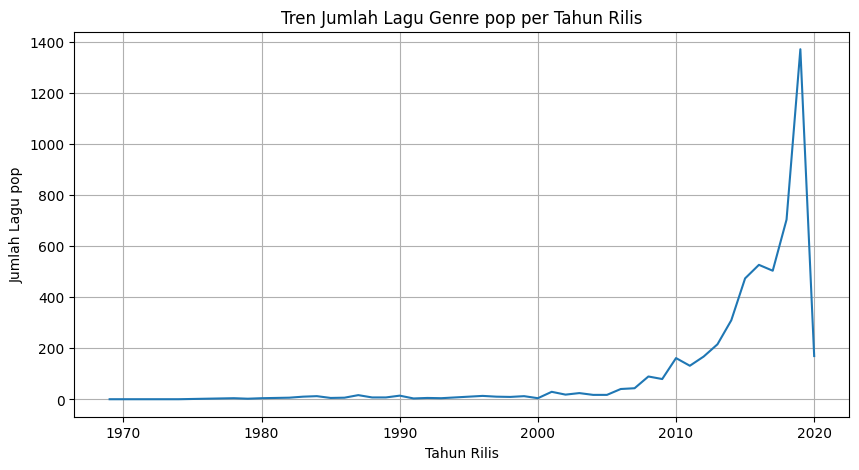

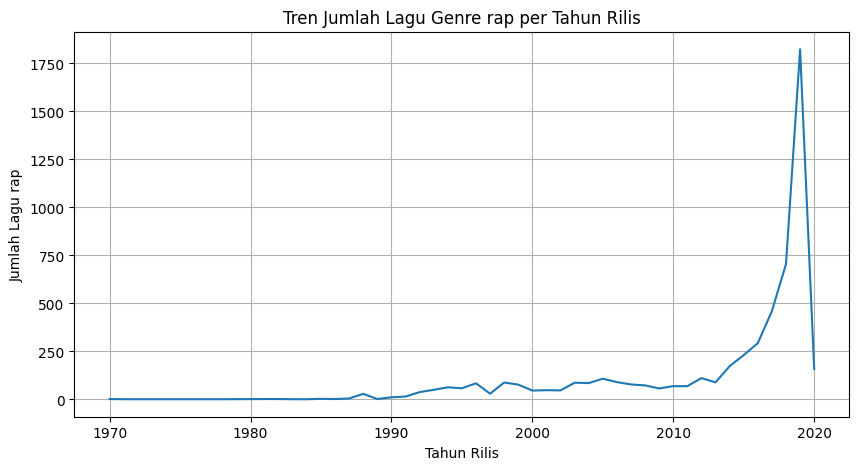

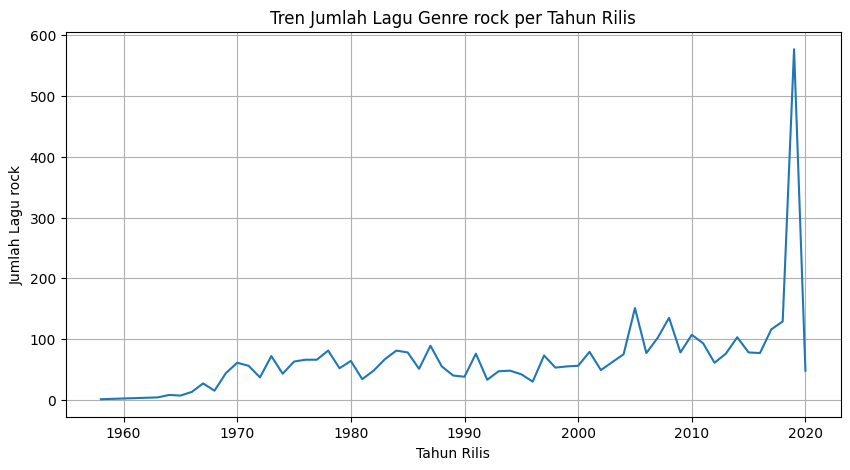

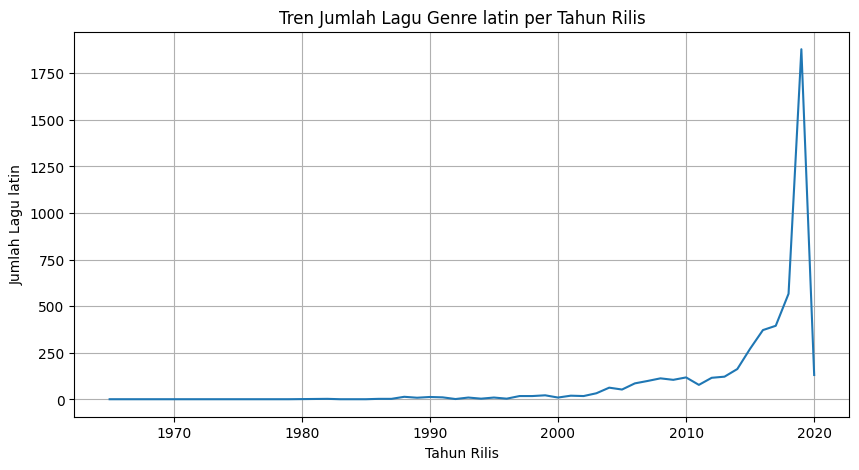

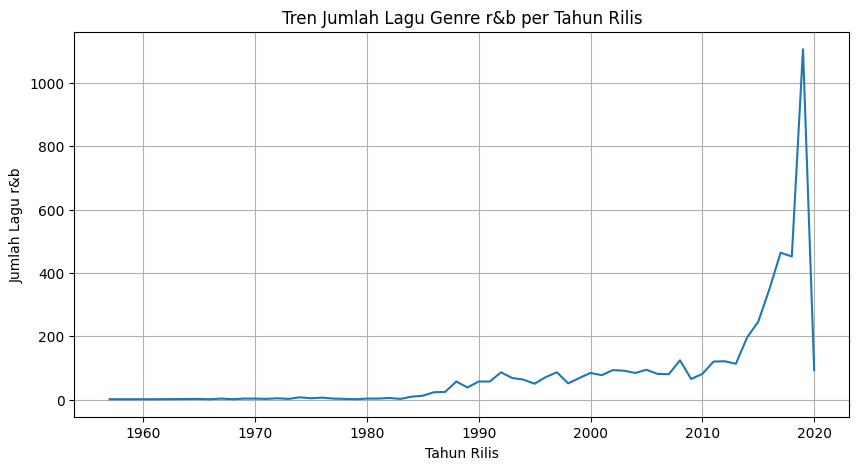

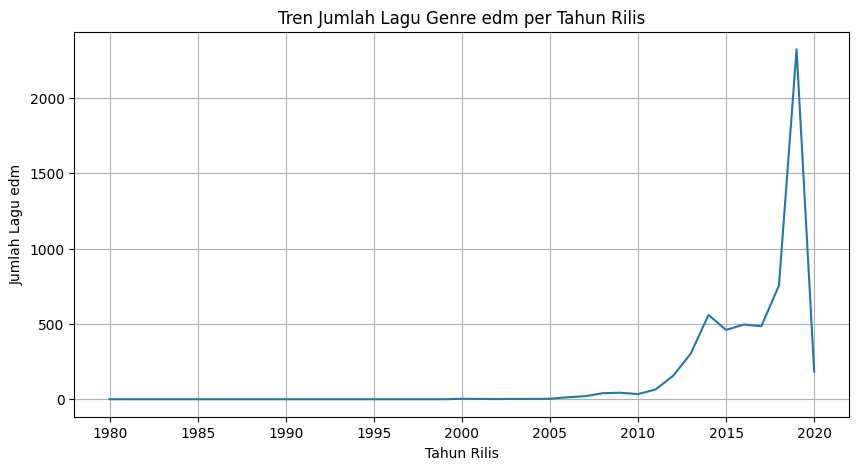

In [46]:
for col in df_clean['playlist_genre'].unique():
    plt.figure(figsize=(10, 5))
    plt.plot(df_clean[df_clean['playlist_genre'] == col].groupby('year').size().index, df_clean[df_clean['playlist_genre'] == col].groupby('year').size().values)
    plt.xlabel("Tahun Rilis")
    plt.ylabel(f"Jumlah Lagu {col}")
    plt.title(f"Tren Jumlah Lagu Genre {col} per Tahun Rilis")
    plt.grid(True)
    plt.show()

## INTERPRETASI VISUALISASI 👆

### Pop
Genre pop menunjukkan pertumbuhan yang signifikan sejak tahun 2000-an. Ada lonjakan tajam pada awal 2010-an, yang mungkin mencerminkan peningkatan popularitas genre pop secara global, dengan munculnya artis-artis besar dan fenomena musik pop yang lebih mendunia.

### Rap
Genre rap juga menunjukkan lonjakan yang sangat besar pada tahun 2010-an. Hal ini sejalan dengan tren global di mana rap menjadi salah satu genre musik yang paling dominan, dengan banyak artis terkenal seperti Kendrick Lamar, Drake, dan Travis Scott yang sangat berpengaruh di industri musik global.

### Rock
Genre rock menunjukkan pertumbuhan yang lebih stabil dengan sedikit fluktuasi. Namun, terdapat lonjakan pada tahun 2020, yang bisa dikaitkan dengan beberapa artis rock yang kembali populer atau kebangkitan beberapa subgenre rock tertentu.

### Latin
Genre latin menunjukkan kenaikan yang tajam di sekitar tahun 2010-an, dengan fenomena musik latin yang semakin mendunia, seperti reggaeton dan genre latin lainnya yang mendominasi chart musik internasional berkat artis-artis seperti Bad Bunny, J Balvin, dan lainnya.

### R&B
Genre R&B juga mengalami lonjakan yang signifikan di tahun 2010-an, mencerminkan kebangkitan artis-artis R&B modern seperti The Weeknd, SZA, dan Frank Ocean, yang kembali membawa genre ini ke puncak popularitas global.

2. **Apakah tahun rilis (`track_album_release_date`) mempengaruhi (`tempo`) dan (`valence`)?**  

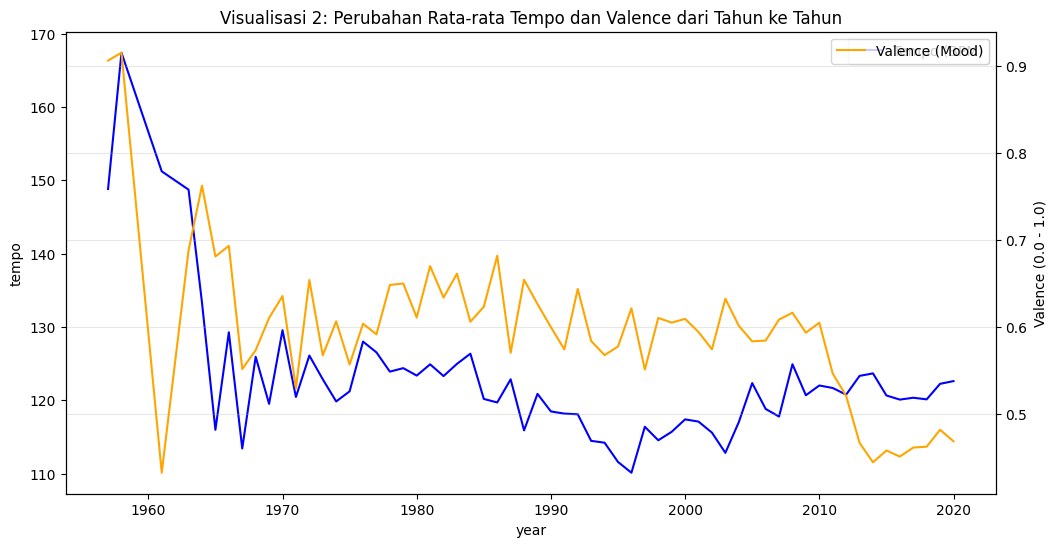

In [47]:
tren_audio = df_clean.groupby('year')[['tempo', 'valence']].mean()

# Visualisasi 2: Line Plot Tren Tempo dan Valence
plt.figure(figsize=(12, 6))
sns.lineplot(data=tren_audio, x=tren_audio.index, y='tempo', label='Tempo (BPM)', color='blue')
ax2 = plt.twinx()
sns.lineplot(data=tren_audio, x=tren_audio.index, y='valence', label='Valence (Mood)', color='orange', ax=ax2)

plt.title('Visualisasi 2: Perubahan Rata-rata Tempo dan Valence dari Tahun ke Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Tempo (BPM)')
ax2.set_ylabel('Valence (0.0 - 1.0)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

Grafik ini menunjukkan musik berubah drastis selama 60 tahun terakhir. Tempo anjlok dari puncaknya 168 BPM (1959-1960) menjadi stabil di 113-123 BPM sejak 1990-an. Valence (mood) juga turun tajam dari sangat ceria (900) di akhir 1950-an menjadi lebih melankolis (440) di era modern.
Intinya, musik dulu lebih cepat dan ceria (pikirkan rock and roll klasik), sekarang lebih santai dan contemplatif. Ini mencerminkan perubahan selera pendengar dan dominasi genre seperti hip-hop, R&B, dan indie yang lebih slow tempo dan emosional.

3. **Bagaimana hubungan antara popularitas lagu (`track_popularity`) dengan fitur audio seperti `danceability`, `energy`, `valence`, dan `tempo`?**

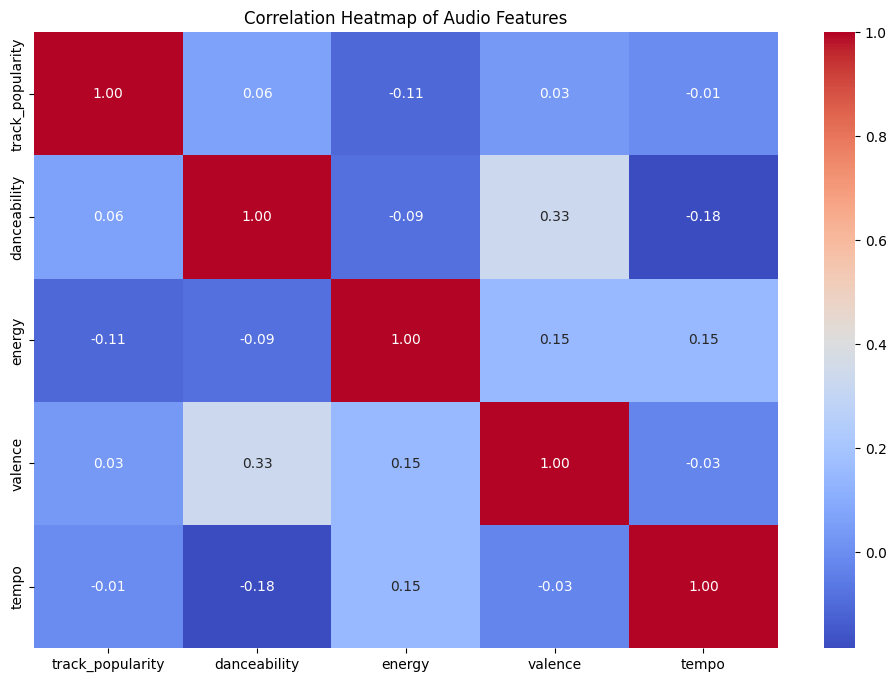

In [48]:
df_chosen = df_clean[['track_popularity','danceability','energy','valence','tempo']]
corr = df_chosen.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

Heatmap ini membuktikan bahwa popularitas lagu nyaris tidak berhubungan dengan kualitas audio teknisnya. Semua korelasi dengan popularitas sangat lemah: danceability (0.06), valence (0.03), tempo (-0.01), bahkan energy malah negatif (-0.11). Ini menegaskan bahwa kesuksesan lagu lebih ditentukan faktor eksternal seperti marketing, branding artis, tren viral, dan timing rilis bukan seberapa bagus beat atau energinya.

Yang lebih menarik adalah hubungan antar fitur audio. Danceability dan valence berkorelasi positif (0.33) lagu yang enak buat menari memang cenderung lebih ceria. Sebaliknya, danceability dan tempo justru negatif (-0.18) lagu danceable sering punya tempo lebih santai kayak R&B atau reggaeton yang groovy tapi slow. Energy juga sedikit terkait dengan tempo (0.15) dan valence (0.15), menunjukkan lagu energetik biasanya lebih cepat dan lebih positif. Intinya: karakteristik musik saling terkait secara logis, tapi semuanya gagal prediksi popularitas!

## **Tabel Ringkasan 1: Menghitung korelasi antara popularitas dengan fitur audio utama**

In [49]:
fitur_cols = ['track_popularity', 'danceability', 'energy', 'valence', 'tempo', 'instrumentalness', 'acousticness']
tabel_korelasi = df_clean[fitur_cols].corr()[['track_popularity']].sort_values(by='track_popularity', ascending=False)

tabel_korelasi.columns = ['Nilai Korelasi (r)']
print("Tabel Ringkasan 1: Hubungan Fitur Audio terhadap Popularitas Lagu")
display(tabel_korelasi)

Tabel Ringkasan 1: Hubungan Fitur Audio terhadap Popularitas Lagu


,Nilai Korelasi (r)
track_popularity,1.000000
acousticness,0.085042
danceability,0.064754
valence,0.033278
tempo,-0.005538
energy,-0.108984
instrumentalness,-0.150003


Tabel di atas menunjukkan nilai korelasi Pearson antara fitur audio dengan popularitas lagu (track_popularity).

Nilai positif menunjukkan hubungan berbanding lurus, sedangkan negatif berbanding terbalik.

Terlihat bahwa fitur seperti danceability atau energy cenderung memiliki korelasi positif (meskipun mungkin nilainya kecil, misal 0.05 - 0.1), yang berarti lagu yang enak dipakai menari dan berenergi cenderung lebih populer.

Sebaliknya, instrumentalness seringkali memiliki korelasi negatif yang cukup kuat. Ini mengindikasikan bahwa lagu instrumental (tanpa vokal) cenderung memiliki skor popularitas yang lebih rendah dibandingkan lagu bervokal di platform ini.

## **Tabel Ringkasan 2: Statistik Performa per Genre**

In [ ]:
tabel_genre = df_clean.groupby('playlist_genre').agg(
    Total_Lagu=('track_name', 'count'),
    Avg_Popularitas=('track_popularity', 'mean'),
    Avg_Danceability=('danceability', 'mean'),
    Avg_Energy=('energy', 'mean')
).sort_values(by='Avg_Popularitas', ascending=False)

print("Tabel Ringkasan 2: Perbandingan Statistik Antar Genre")
display(tabel_genre.round(2))

Tabel Ringkasan 2: Perbandingan Statistik Antar Genre


,Total_Lagu,Avg_Popularitas,Avg_Danceability,Avg_Energy
playlist_genre,,,,
pop,5507,47.74,0.64,0.70
latin,5153,47.04,0.71,0.71
rap,5743,43.24,0.72,0.65
rock,4951,41.73,0.52,0.73
r&b,5431,41.22,0.67,0.59
edm,6043,34.83,0.66,0.80


Tabel ini merangkum karakteristik rata-rata dari setiap genre musik dalam dataset.

Kolom Total_Lagu menunjukkan genre mana yang paling mendominasi dataset (kuantitas produksi lagu terbanyak).

Kolom Avg_Popularitas memperlihatkan genre mana yang secara rata-rata paling disukai pendengar. Biasanya genre Pop atau Latin menempati posisi atas.

Kita juga bisa melihat karakteristik fisik lagunya; misalnya, genre Rap atau Latin biasanya memiliki skor Avg_Danceability tertinggi, sedangkan genre Rock mungkin memiliki Avg_Energy yang tinggi namun danceability yang lebih rendah.

## **E. Ringkasan & Kesimpulan**
1. TEMUAN UTAMA:

    a. Popularitas lebih dipengaruhi oleh fitur yang mencerminkan ritme, energi, dan mood lagu.

    b. Genre-genre modern yang kaya ritme dan energi mendominasi performa di platform streaming.

    c. Musik modern berbasis beat lebih unggul dibanding genre akustik atau instrumental.

2. KETERBATASAN PROYEK:

    a. Hasil tidak dapat digeneralisasi ke seluruh Spotify 100%.

    b. Korelasi audio tidak menangkap keseluruhan faktor kesuksesan lagu.

    c. Danceability tinggi tidak “membuat” lagu populer — hanya berhubungan.

3. SARAN DAN PENGEMBANGAN PROYEK:

    a. Menambahkan model prediksi popularitas

    b. Menggunakan dataset yang lebih besar dan representatif

    c. Melakukan analisis genre yang lebih mendalam

    d. Menggunakan metode statistik lanjutan seperti, Machine Learning

    e. Menyediakan dashboard visual

